## Observations and Insights
* The tumor volume for mice who were administered Capomulin	had lower standard deviation and variance acorss more times being administered
* Capomulin and Ramicane both have similar sample data as do Infubinol and Ceftamin. More research can be done on the similarities of these 2 groups of drugs to see how they so similarly affected the Tumor Volume of the Mice. 
* In looking at the scatter plot, there looks to be a positive correlation between mouse weight and the average tumor volume. Furthermore, the liner regression displayed can be a good representation to predict futre samples.
---

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(study_results,mouse_metadata, on="Mouse ID")

# Display the data table for preview
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Check the number of mice.
len(merge_df["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicated_id = merge_df.loc[merge_df.duplicated(subset = ['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicated_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
merge_df.loc[merge_df['Mouse ID'] == 'g989', :]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = merge_df.loc[merge_df['Mouse ID'].isin(duplicated_id) == False]

In [6]:
# Check the number of mice in the clean DataFrame.
non_dupl = len(cleaned_df["Mouse ID"].unique())
non_dupl

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use this straighforward method, create multiple series and put them all in a dataframe at the end.
drug_group1 = cleaned_df.groupby(['Drug Regimen'])


drug_df1 = pd.DataFrame({'Mean Tumor Volume' : drug_group1['Tumor Volume (mm3)'].mean(),
                        'Median Tumor Volume' : drug_group1['Tumor Volume (mm3)'].median(),
                        'Tumor Volume Variance' : drug_group1['Tumor Volume (mm3)'].var(),
                        'Tumor Volume Std. Dev.' : drug_group1['Tumor Volume (mm3)'].std(),
                        'Tumor Volume Std. Err.' : drug_group1['Tumor Volume (mm3)'].sem()})

drug_df1

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use method to produce everything with a single groupby function
drug_group2 = cleaned_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)' : ['mean', 'median', 'var', 'std', 'sem']})
drug_group2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

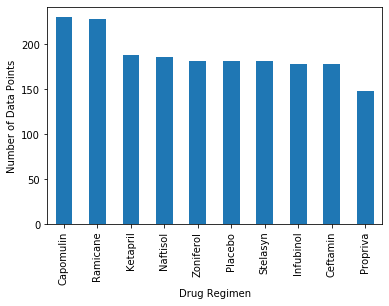

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
drug_count = cleaned_df['Drug Regimen'].value_counts()

drug_chart = drug_count.plot(kind='bar')

# drug_chart.set_xlabel("Drug Regimen")
drug_chart.set_xlabel("Drug Regimen")
drug_chart.set_ylabel("Number of Data Points")

plt.show()


In [10]:
drug_count

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

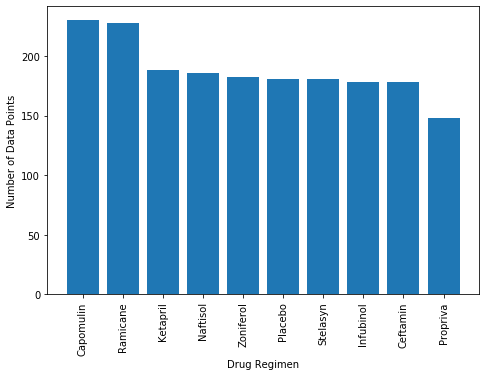

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

drugs = ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Placebo',
         'Stelasyn','Infubinol', 'Ceftamin', 'Propriva']
counts = [230, 228, 188, 186, 182, 181, 181, 178, 178, 148]

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.xticks(rotation=90)

ax.bar(drugs,counts)
plt.show()

In [14]:
sex_count

Male      958
Female    922
Name: Sex, dtype: int64

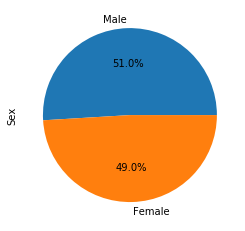

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_count = cleaned_df['Sex'].value_counts()


sex_chart = sex_count.plot(kind='pie',autopct="%1.1f%%")

sex_chart.set_ylabel("Sex")

plt.show()

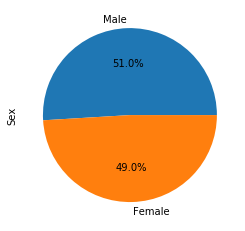

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex = 'Male', 'Female'
sex_count = cleaned_df['Sex'].value_counts()

plt.pie(sex_count,labels=sex, autopct='%1.1f%%')

plt.ylabel("Sex")

plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across each of the treatment regimens: 
mouse_group = cleaned_df.groupby('Mouse ID')

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = mouse_group['Timepoint'].max()
mouse_df = last_timepoint.reset_index()
# max_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df1 = pd.merge(mouse_df, cleaned_df, how = 'left', on = ['Mouse ID', 'Timepoint'] )
merge_df1

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [52]:
# Put 4 treatment names into a list for use with a for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create a empty list to fill with tumor vol data (for plotting) (hint: each element of the list will be series)
tumor_vol_list = []

# For each treatment in the list, calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatment_list:
    tumor_data = merge_df1.loc[merge_df1['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    tumor_vol_list.append(tumor_data)

    quartiles = tumor_data.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    
    # add subset to tumor volume data list
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)    
    upper_bound = upperq + (1.5 * iqr)
    
    outlier = tumor_data.loc[(tumor_data < lower_bound) | (tumor_data > upper_bound)]
    print(f"{drug} potential outliers: {outlier}")  

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


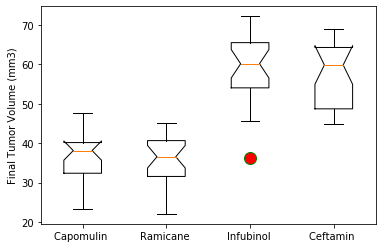

In [107]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()

#flier adjustment
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='g')

#plotting both lists used above
ax1.boxplot(tumor_vol_list, treatment_list, flierprops=flierprops)

#setting up labels
ax1.set_xticklabels(['Capomulin ', 'Ramicane ', 'Infubinol ', 'Ceftamin '])
ax1.get_xaxis().tick_bottom()
ax1.set_ylabel('Final Tumor Volume (mm3)')

plt.show()

## Line and Scatter Plots

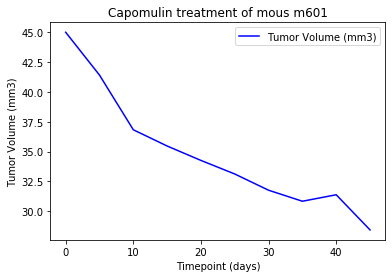

In [120]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#need to take the full combined datafram and filter for  the mouse id
capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"] == "Capomulin"]
# capomulin_df

#locate Mouse ID 'm601'
capomulin_mouse = capomulin_df[capomulin_df["Mouse ID"] == 'm601']
capomulin_mouse = capomulin_mouse.set_index('Timepoint')

capomulin_tumor = pd.DataFrame(capomulin_mouse['Tumor Volume (mm3)'])

capomulin_tumor.plot(color = 'blue')
plt.title('Capomulin treatment of mous m601')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [121]:
# capomulin_df

In [122]:
# capomulin_weight

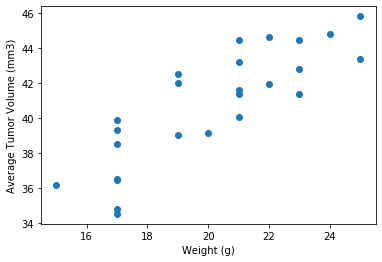

In [112]:
#Create a new groub by to combine mouse IDs and to calculate the avg for 'Tumor Volume (mm3)' & 'Weight (g)
capomulin_weight = capomulin_df.groupby('Mouse ID').mean()[['Tumor Volume (mm3)','Weight (g)']]

# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.scatter(capomulin_weight['Weight (g)'],capomulin_weight['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


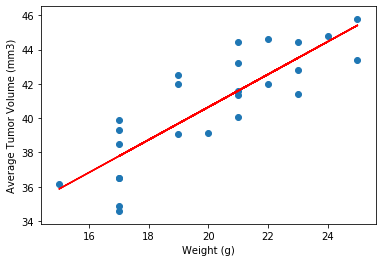

In [119]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = capomulin_weight['Weight (g)']
y_values = capomulin_weight['Tumor Volume (mm3)']

correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

#calculate regress values to plot linear regression line
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Generate a scatter plot of mouse weight versus average tumor volume and a linear regression line for the Capomulin regimen
plt.plot(x_values,regress_values,"r-")
plt.scatter(capomulin_weight['Weight (g)'],capomulin_weight['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()